In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#get the data
url = 'https://github.com/shiv-2025/Salary_pred/blob/main/adult.csv?raw=true'
df_raw = pd.read_csv(url)
print(df_raw.head(5))

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week         country  salary  
0          2174             0              40   United-States   <=50

In [3]:
#look for null values in dataframe
df_raw.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [4]:
#convert categorical variable into numerical
#df_raw['salary']=df_raw['salary'].map({' <=50K':0, ' >50K':1})

In [5]:
df_raw.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [6]:
df_raw.country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [7]:
df = df_raw.drop(['education'], axis=1)
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
#dividing data into independent and dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
#rename columns for convinience
X.columns = ['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'country']

In [10]:
#extract categorical and numerical columns
categorical_feature = [feature for feature in X.columns if X[feature].dtypes == 'O']
numerical_feature = [feature for feature in X.columns if X[feature].dtypes != 'O']

numerical_feature

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [11]:
#trim whitespaces from this df
X[categorical_feature] = X[categorical_feature].apply(lambda x: x.str.strip())
X.country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [12]:
#replace '?' with None values to find out null values
X = X.replace({'?': None})
X.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
country            583
dtype: int64

In [13]:
#fill null values with median
X.fillna(X.mode().iloc[0], inplace=True)
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
dtype: int64

In [14]:
X.country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

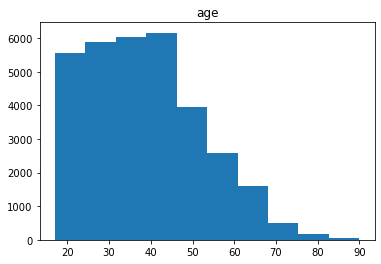

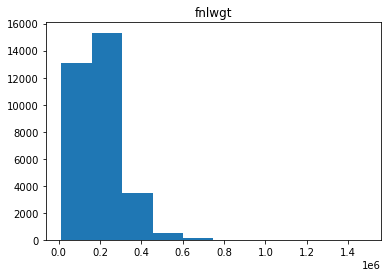

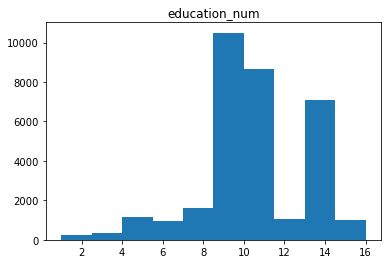

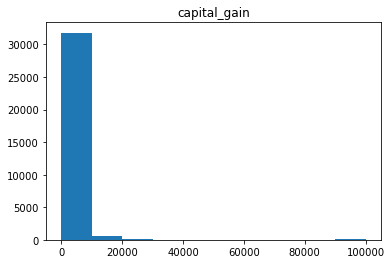

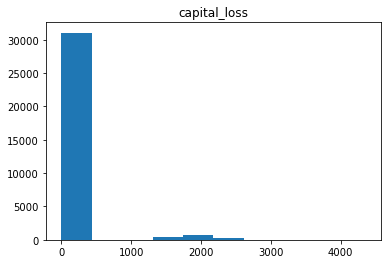

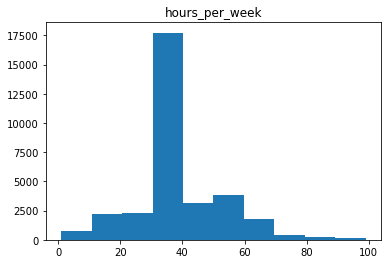

In [15]:
#distribution of num values
for i in X[numerical_feature]:
    plt.hist(X[i])
    plt.title(i)
    plt.show()

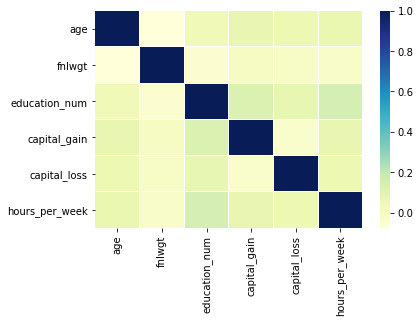

In [16]:
X[numerical_feature].corr()

sns.heatmap(X.corr(), linewidths=0.1, cmap="YlGnBu")

In [17]:
#One hot encoding of categorical variables using get_dummies function
X_cat = pd.concat([pd.get_dummies(X[categorical_feature], drop_first=True), X[numerical_feature]], axis=1)

In [18]:
#Create train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cat,y, random_state=1234, test_size= 0.2)

In [19]:
#Applying Logistic regression alogorithm to train test and find accuaracy of model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8031629049593122

In [20]:
#Check with Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8524489482573315

In [21]:
y_pred = rf.predict(X_test)

In [22]:
# Saving the model
import pickle
pickle.dump(rf, open('salary_clf.pkl', 'wb'))

In [23]:
X_train.to_csv('train.csv')